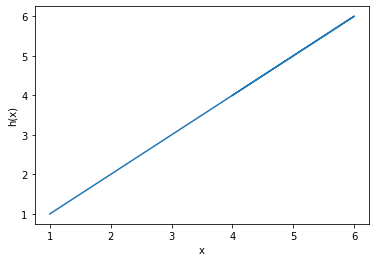

In [1]:
#Part A
#1
import numpy as np
import matplotlib.pyplot as plt

arr = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
t0 = 1.2
t1 = 0.5
h = arr
for i in arr:
    h[i] = t0+(t1*i)
plt.ylabel('h(x)')
plt.xlabel('x')
plt.plot(arr,h)
plt.show()

In [2]:
#2
A = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
B = np.array([2, 1, 0.5, 1, 3, 3, 2, 5, 4])

AdotB = np.dot(A,B)
print (AdotB)

82.0


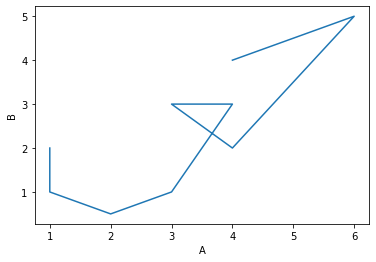

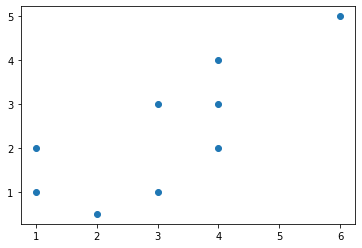

In [3]:
#3
plt.xlabel('A')
plt.ylabel('B')
plt.plot(A,B)
plt.show()
plt.scatter(A,B)
plt.show()

In [4]:
#4 mean squared error

n = len(A)
sum = 0
for i in range(n):
    sum = sum+ (A[i] - B[i]) ** 2
msc = sum/n
print (msc)

#using numpy
mean_sq_err = np.sum((A-B)**2)/len(A)
print(mean_sq_err)

#using inbuilt lib
from sklearn.metrics import mean_squared_error
m = mean_squared_error(A, B)
print(m)

1.4722222222222223
1.4722222222222223
1.4722222222222223


In [5]:
#5

def h(x,t1):
    return t1*x
def compute_cost_error(n,t1,A,B):
    error = 0
    for i in range(n):
        error = error + ((h(A[i],t1) - B[i]) ** 2)
    return error/(2*n)

In [6]:
t = 0.5
print(compute_cost_error(len(A),t,A,B))

0.7916666666666666


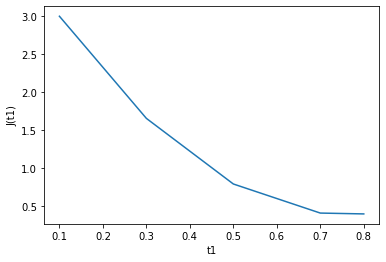

In [7]:
t1 = np.array([0.1,0.3,0.5,0.7,0.8])
cost = []
k=0
for i in t1:
    cost.append(compute_cost_error(len(A),i,A,B))
plt.xlabel('t1')
plt.ylabel('J(t1)')
plt.plot(t1,cost)
plt.show()

In [8]:
# def compute_cost_function(n,t1,A,B):
#     sumSquaredError = np.square(np.dot(A, t1) - B).sum()
#     cost = sumSquaredError / (2*n)
#     return cost

In [9]:
#Part B
#a
from pandas import read_csv
path = 'grades.csv'
data = read_csv(path)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
#b
X = np.array(data["studytime"])
Y = np.array((data["G1"]+data["G2"]+data["G3"])/3)
Y = Y.reshape(-1,1) # to arrange the data in one column
X = X.reshape(-1,1)
# print(X,Y)

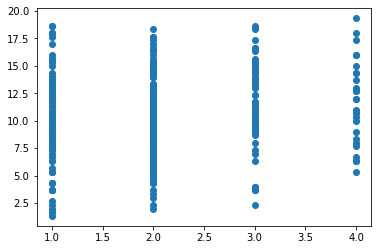

In [11]:
#c
plt.scatter(X,Y)
plt.show()

[[-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-1.23409473]
 [-0.04514981]
 [-1.23409473]
 [ 1.14379512]
 [-1.23409473]
 [ 1.14379512]
 [ 1.14379512]
 [-1.23409473]
 [-1.23409473]
 [-0.04514981]
 [-1.23409473]
 [-0.04514981]
 [ 1.14379512]
 [ 2.33274004]
 [-0.04514981]
 [ 1.14379512]
 [-0.04514981]
 [ 1.14379512]
 [ 1.14379512]
 [-0.04514981]
 [ 1.14379512]
 [ 1.14379512]
 [-1.23409473]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [ 1.14379512]
 [-1.23409473]
 [-1.23409473]
 [ 1.14379512]
 [-1.23409473]
 [-0.04514981]
 [-0.04514981]
 [ 1.14379512]
 [-0.04514981]
 [ 1.14379512]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [ 1.14379512]
 [-1.23409473]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [ 1.14379512]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-0.04514981]
 [-1.23409473]
 [-0.04514981]
 [-0.04514981]
 [ 1.14379512]
 [-0.04514981]
 [-0.04514981]
 [ 2.33274

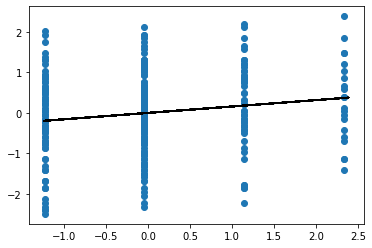

In [12]:
#d
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.80, test_size=0.20)

from sklearn.preprocessing import StandardScaler

X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

print(X_train)

y_train=StandardScaler().fit_transform(y_train)
y_test=StandardScaler().fit_transform(y_test)

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test,y_pred,color='black')
plt.show()

In [23]:
#e
def gradient_descent(alpha, x, y, max_iter=150): 
    theta = 0
    m = np.size(x, axis = 0)
    xTrans = x.transpose()
    for i in range(max_iter):
        hypothesis = np.dot(x, theta)
        loss= hypothesis - y
#         cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss)
        theta = theta - (alpha/m) * gradient
    return theta
theta = gradient_descent(0.01, X_train, y_train)
print (theta)
t_theta = theta

[[4.51441303]]


In [24]:
#f
for i in range(1, 10):
    theta = gradient_descent(i/10, X_train, y_train,150)
    print(theta)

[[4.51665693]]
[[4.51665693]]
[[4.51665693]]
[[4.35523763]]
[[-7.32876062e+25]]
[[-5.33573189e+44]]
[[-2.16969842e+59]]
[[-1.8281431e+71]]
[[-2.18069594e+81]]


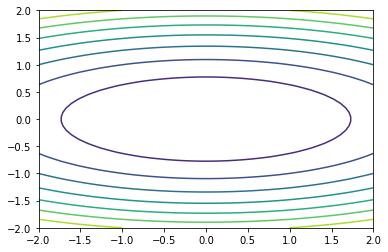

In [25]:
#g
#exapmle
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
plt.contour(xmesh, ymesh, fmesh)
plt.show()

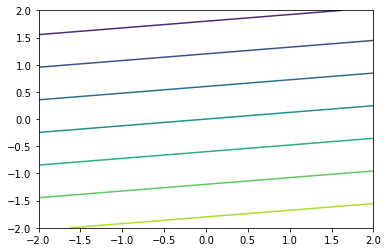

In [22]:
def f1_cost(x,t_theta):
    #cost = x*theta - y
    return x[0]*t_theta - x[1]


xmesh,ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f1_cost(np.array([xmesh, ymesh]),t_theta)
plt.contour(xmesh,ymesh,fmesh)
plt.show()

In [17]:
#h
from sklearn.model_selection import KFold 
kf = KFold() 
# X is the feature set and y is the target
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]

Train: [ 79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323

In [18]:
kf = KFold(n_splits=8,random_state=None) 
# X is the feature set and y is the target
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]

Train: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294